In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [112]:
df=pd.read_csv('/Users/cristianmurillo/Documents/Data scientis /Machine learning models /Data_Sets/Titanic-Dataset.csv')

In [113]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [114]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

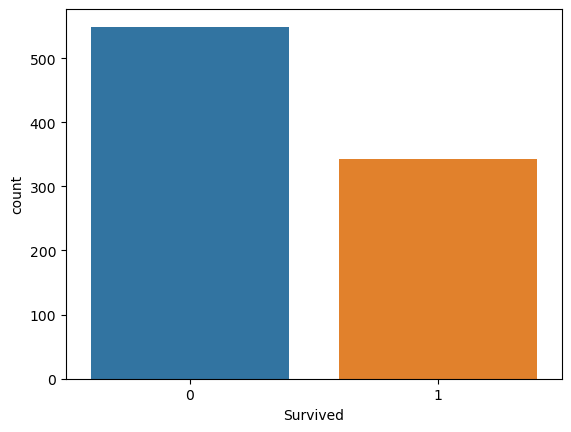

In [115]:
sns.countplot(x='Survived',data=df)

<Axes: xlabel='Survived', ylabel='count'>

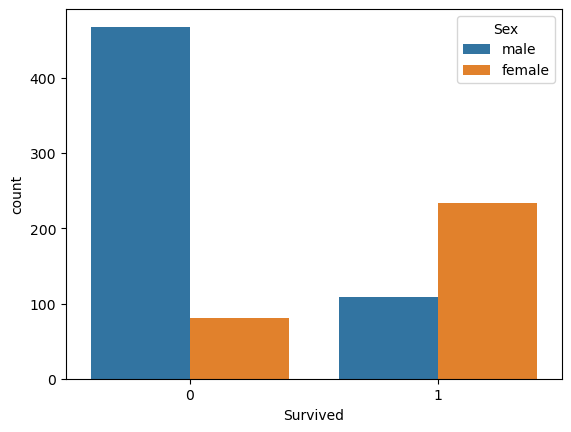

In [116]:
sns.countplot(x='Survived',data=df,hue='Sex')

In [117]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


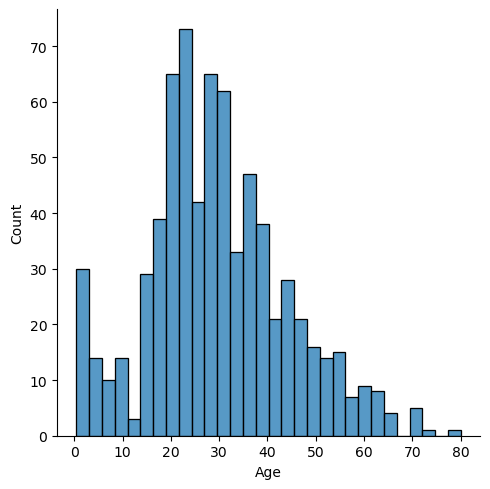

In [118]:
sns.displot(x='Age',data=df,bins=30)

In [119]:
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)

In [120]:
df = df.drop('Cabin',axis=1)

In [121]:
df = df.dropna()

In [122]:
df = df.drop(['Name','PassengerId','Ticket'],axis=1)

In [123]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [124]:
df = df.join(pd.get_dummies(df['Sex'],drop_first=True,dtype=int))

In [125]:
df = df.drop('Sex',axis=1)

In [126]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


In [127]:
df = df.join(pd.get_dummies(df['Embarked'],drop_first=True,dtype=int)).drop('Embarked',axis=1)

<Axes: >

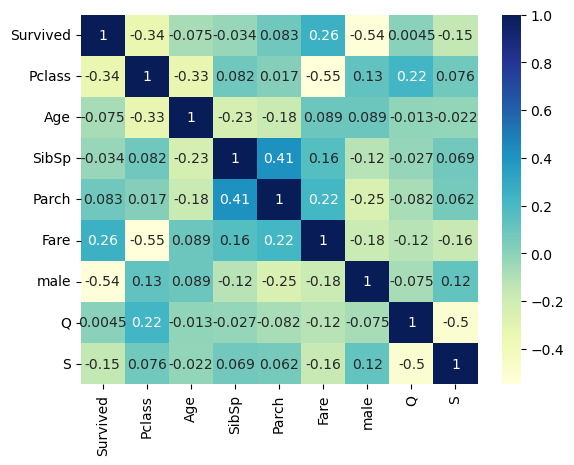

In [128]:
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

<Axes: xlabel='Survived', ylabel='count'>

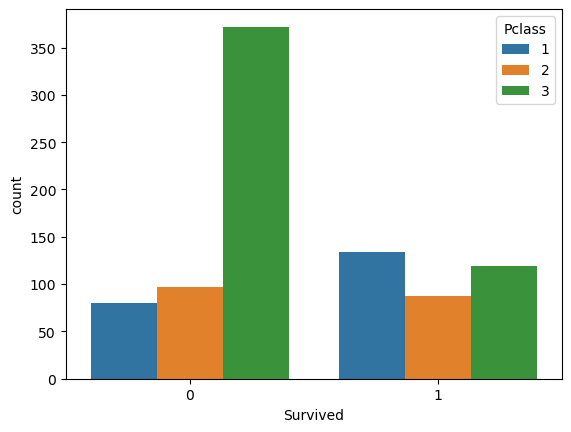

In [129]:
sns.countplot(x='Survived',data=df,hue='Pclass')

In [130]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [132]:
results = []
for i in range(1,15):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    score = accuracy_score(y_test,predictions)
    results.append(score)
    print(f'Accuracy score for max_depth = {i} is {score}')
    

Accuracy score for max_depth = 1 is 0.7902621722846442
Accuracy score for max_depth = 2 is 0.7940074906367042
Accuracy score for max_depth = 3 is 0.846441947565543
Accuracy score for max_depth = 4 is 0.846441947565543
Accuracy score for max_depth = 5 is 0.8314606741573034
Accuracy score for max_depth = 6 is 0.8314606741573034
Accuracy score for max_depth = 7 is 0.8352059925093633
Accuracy score for max_depth = 8 is 0.8089887640449438
Accuracy score for max_depth = 9 is 0.797752808988764
Accuracy score for max_depth = 10 is 0.8014981273408239
Accuracy score for max_depth = 11 is 0.7677902621722846
Accuracy score for max_depth = 12 is 0.7790262172284644
Accuracy score for max_depth = 13 is 0.7752808988764045
Accuracy score for max_depth = 14 is 0.7602996254681648


<Axes: >

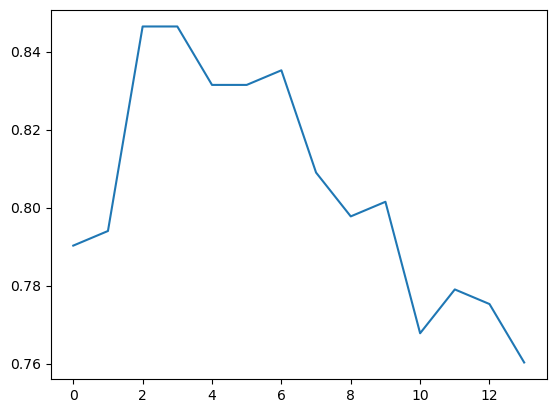

In [133]:
sns.lineplot(data=results)

In [134]:
model = DecisionTreeClassifier(max_depth=7)
model.fit(X_train,y_train)
predictions = model.predict(X_test)

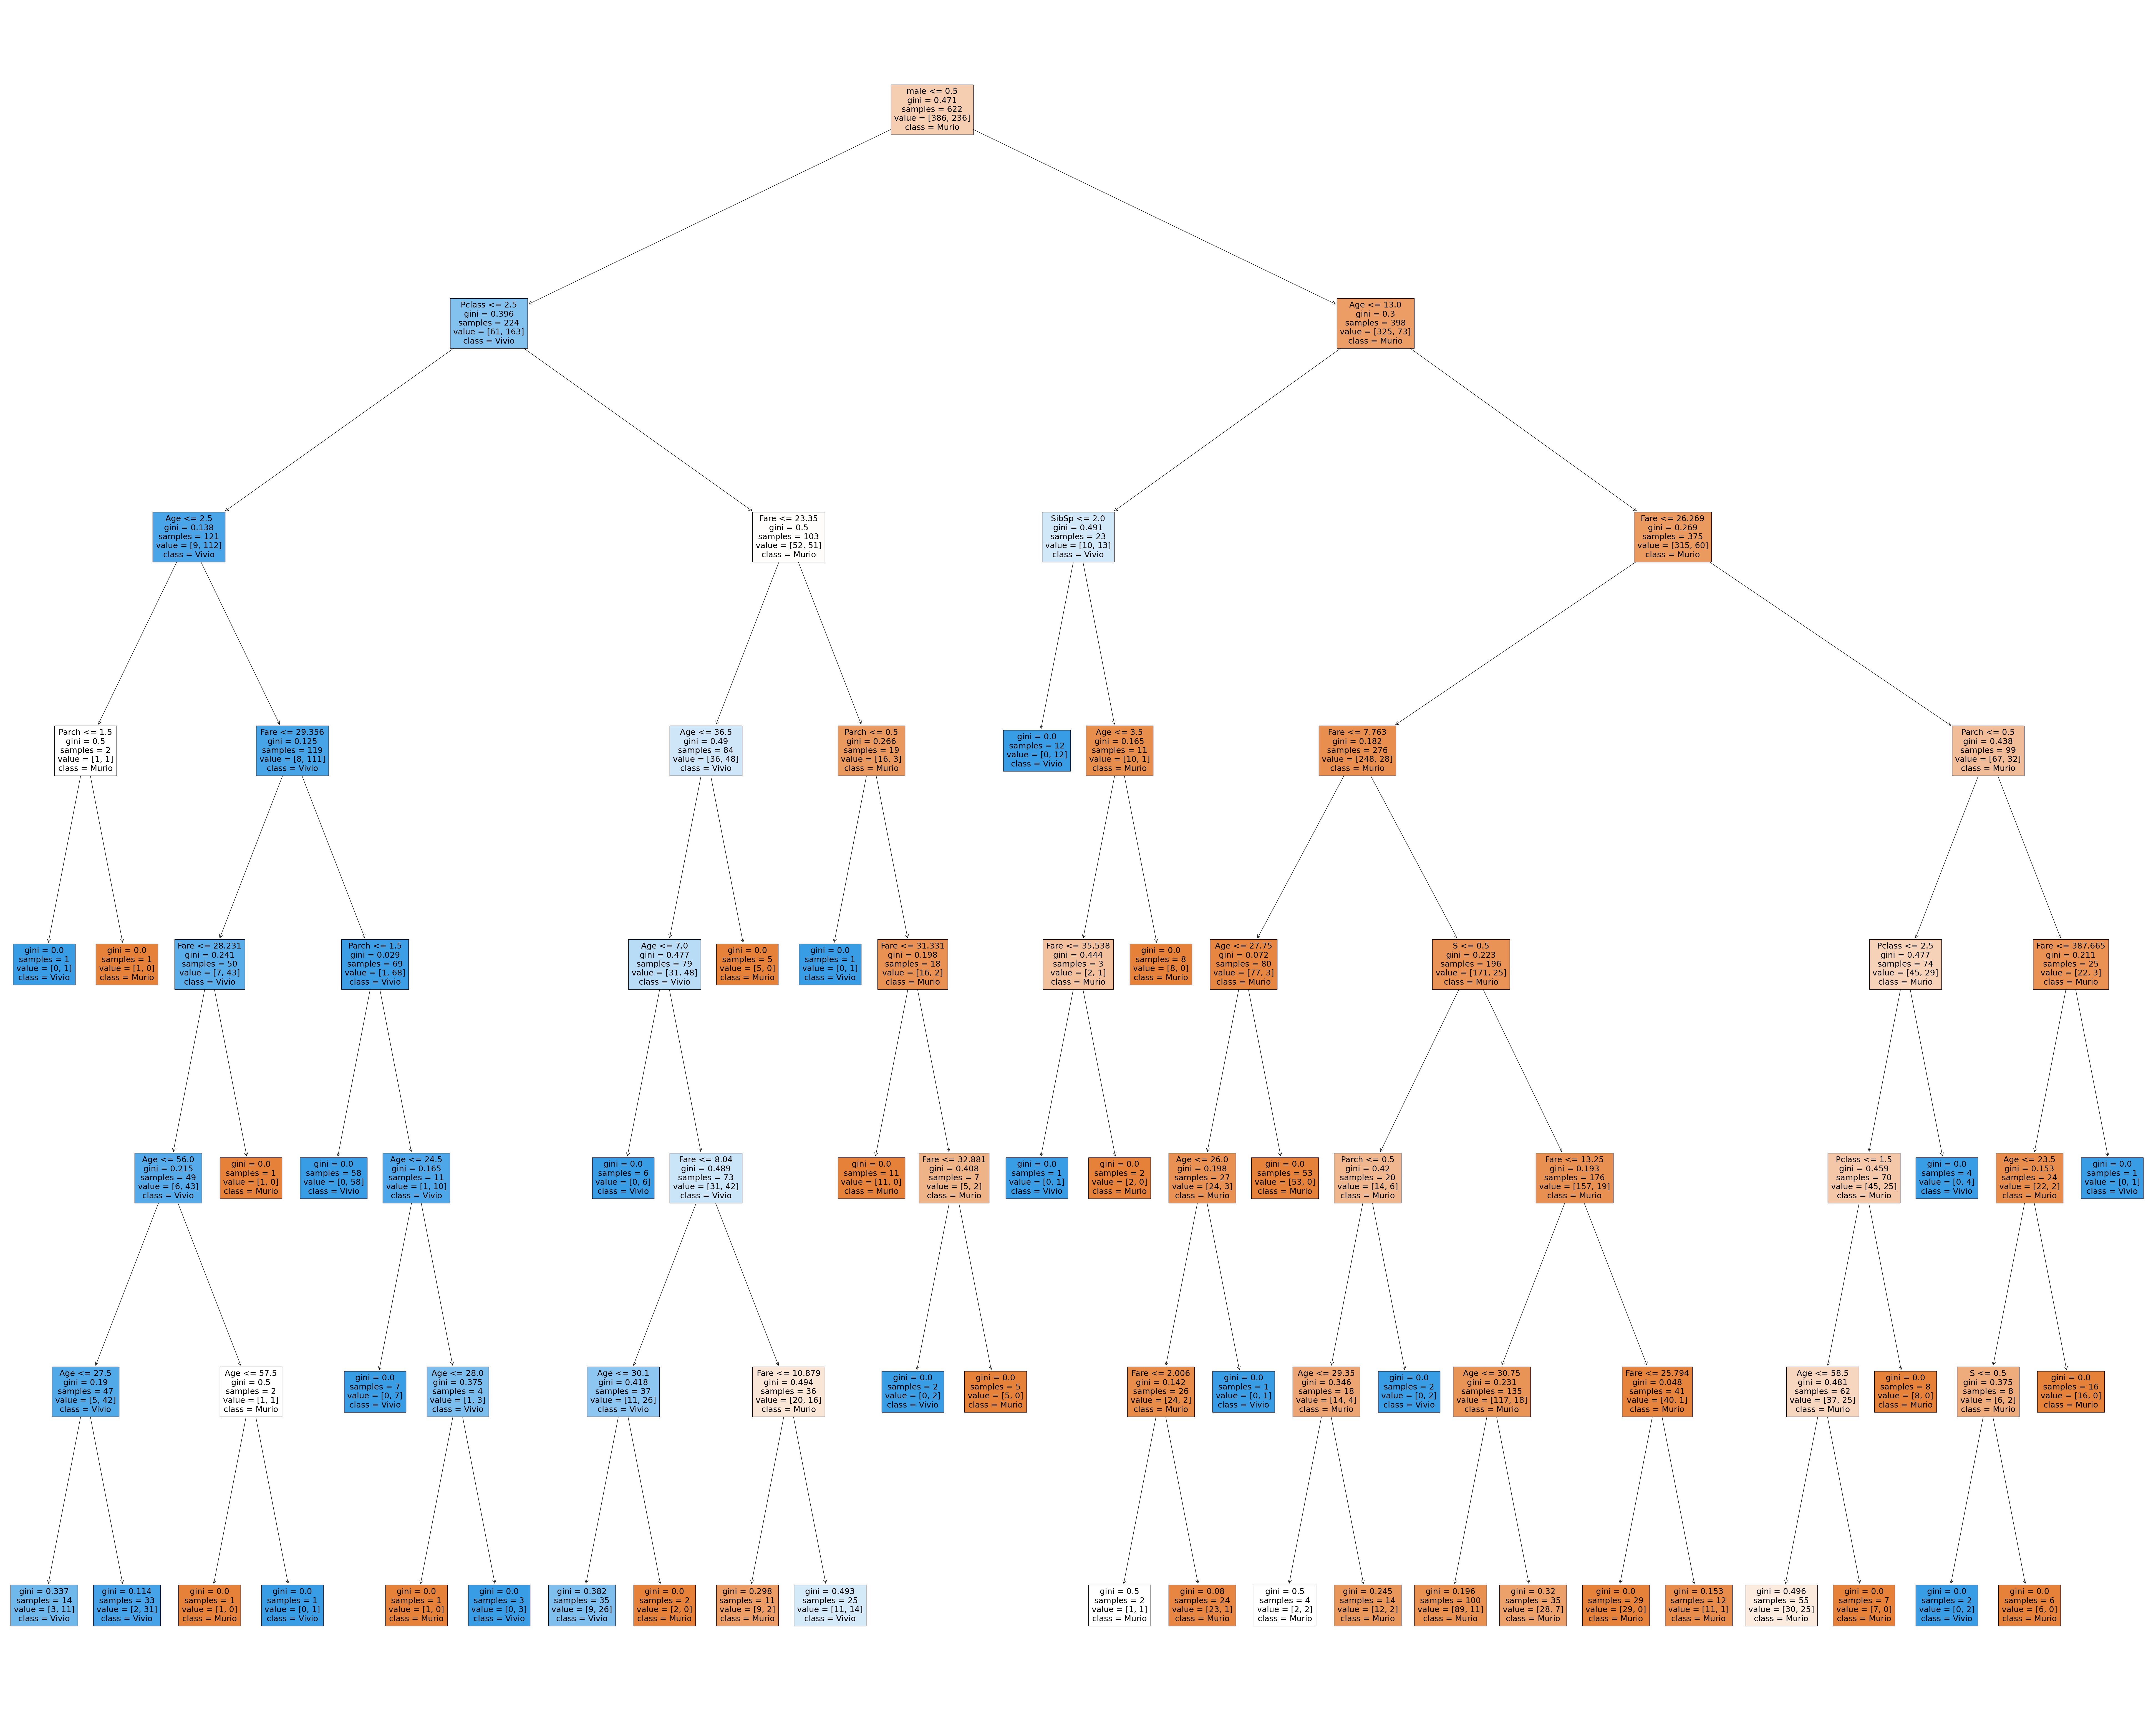

In [137]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 80))

plot_tree(
    model,
    filled=True,
    feature_names=list(X_train.columns),
    class_names=['Murio', 'Vivio']
)

plt.show()
